In [1]:
import numpy as np
import pandas as pd
%matplotlib inline


import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.patches as mpatches

# Nearest Neighbor

Given a collection of $n$ labeled data points $\mathcal{D} = \{(x,y)_i\}_{i=1}^n$, where each data point is a collection of features, and a distance metric, $d(p,q)$, defined on points $p$ and $q$, we can classify a new data point $z$ by considering the label of its closest neighbor. The new data point then adopts the same label as its nearest neighbor.

To see an example of this, suppose we have information on 20 cats and 20 dogs. Someone measured their ear pointiness and their claw sharpness on a scale of 0-10. Here, scores close to 0 indicate ears on the floppy side or unsharp claws, while scores close to 10 indicate pointy ears or sharp claws.

These measurements correspond to features, or characteristics, of these animals. The results are recorded in the DataFrame below. Note we also include a label that denotes if the corresponding characteristics were taken from a cat or a dog.

In [2]:
np.random.seed(seed=1243)
dog_ears = np.random.normal(loc=2.5, scale=2.25, size=20)

cat_ears = np.random.normal(loc=6, scale=1.5, size=20)

cat_claws = np.random.normal(loc=5, scale=2, size=20)

dog_claws = np.random.normal(loc=3.5, scale=1.56, size=20)
animal_labels = np.concatenate((np.full((20, ), ['dog']),  np.full((20, ), ['cat'])))


characteristic_df = pd.DataFrame({'claw sharpness': np.concatenate((dog_claws, cat_claws)),
              'ear pointiness': np.concatenate((dog_ears, cat_ears)), 'Label': animal_labels})
characteristic_df = characteristic_df.sample(frac=1).reset_index(drop=True)

In [3]:
characteristic_df.head()

,claw sharpness,ear pointiness,Label
0,3.825685,6.406667,cat
1,4.763658,1.951387,dog
2,6.329188,5.066956,cat
3,2.824689,1.649148,dog
4,5.949133,4.280015,cat


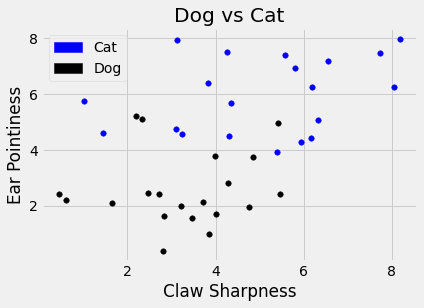

In [4]:
cat_df = characteristic_df.loc[characteristic_df.Label =='cat']
dog_df = characteristic_df.loc[characteristic_df.Label =='dog']
plt.scatter(cat_df['claw sharpness'], cat_df['ear pointiness'] , color='blue', s=30)
plt.scatter(dog_df['claw sharpness'], dog_df['ear pointiness'] , color='black', s=30);

blue_patch = mpatches.Patch(color='blue', label='Cat')
black_patch = mpatches.Patch(color='black', label='Dog')
plt.legend(handles=[blue_patch, black_patch])
plt.title("Dog vs Cat")
plt.ylabel('Ear Pointiness')
plt.xlabel('Claw Sharpness');

Above we see the black dots represent the 'dog' label or class, while blue dots represent the 'cat' label or class. We see that based on this simulated data, dogs tend to have floppier ears than cats while the claw sharpness of cats has a larger range.

Now, suppose have a new data point, in red on the graph below, with a 7 on claw sharpness and 6 on ear pointiness, (7,6), that we want to classify as 'cat' or 'dog'.

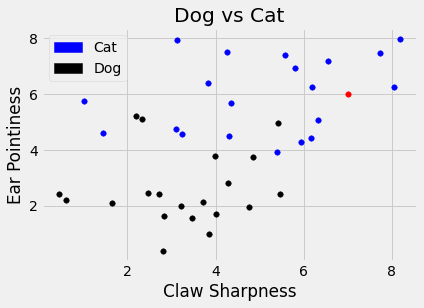

In [5]:
plt.scatter(cat_df['claw sharpness'], cat_df['ear pointiness'] , color='blue', s=30)
plt.scatter(dog_df['claw sharpness'], dog_df['ear pointiness'] , color='black', s=30);

plt.scatter(7,6 , color='red', s=30);
blue_patch = mpatches.Patch(color='blue', label='Cat')
black_patch = mpatches.Patch(color='black', label='Dog')
plt.legend(handles=[blue_patch, black_patch])

plt.title("Dog vs Cat")
plt.ylabel('Ear Pointiness')
plt.xlabel('Claw Sharpness');

The nearest neighbor algorithm says to search for the closest point and label the new data point with that classification. We will use the standard Euclidean distance, which calculates the shortest straight line path between two points. Below we define this function and call it on the points $(0,0)$ and $(1,1)$ to confirm the calculation.

In [6]:
# the Euclidean distance
def distance(pt1, pt2):   
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

In [7]:
distance(np.array([0,0]), np.array([1,1]))

1.4142135623730951

To use this function on our DataFrame, we firstc extract the x and y coordinate from our DataFrame to an array. We use the `.iloc` method to extract both features of interest. Below is how we could compute the distance between the point at index 1 in the DataFrame with our new point of interest $(7,6)$.


In [8]:
one_point =characteristic_df.iloc[1,0:2].to_numpy()
one_point

array([4.763657934907621, 1.951386783638458], dtype=object)

In [9]:
distance(one_point, np.array([7,6]))

4.625202136966448

We want to do this will all points in our data and find the smallest! So we create a function that takes in a row of features (note this corresponds to one point) and a new point of interest and computes the distance for each row.

In [10]:
def row_wise_distance(row, my_point):
    '''Computes the distance between the given my_point and a single df row'''
    return distance(my_point, np.array(row))

We can use the `.apply` method and specify our point $(7,6)$ as an additional argument to create a new column in the DataFrame that computes the distance to point $(7,6)$ from each point in the DataFrame. 

In [11]:
characteristic_df['Distance to point'] =  \
            characteristic_df[['claw sharpness', 'ear pointiness']].  \
            apply(row_wise_distance, args=(np.array([7,6]),), axis=1)

In [12]:
characteristic_df.head()

,claw sharpness,ear pointiness,Label,Distance to point
0,3.825685,6.406667,cat,3.200259
1,4.763658,1.951387,dog,4.625202
2,6.329188,5.066956,cat,1.149156
3,2.824689,1.649148,dog,6.030185
4,5.949133,4.280015,cat,2.015607


We can then sort this new column to find the shortest distance.

In [13]:
sorted_df = characteristic_df.sort_values(by = 'Distance to point').reset_index()
sorted_df.head()

,index,claw sharpness,ear pointiness,Label,Distance to point
0,39,6.183873,6.240770,cat,0.850902
1,21,8.055856,6.270573,cat,1.089973
2,2,6.329188,5.066956,cat,1.149156
3,13,6.557677,7.194344,cat,1.273620
4,15,5.814228,6.939289,cat,1.512719


From this table we see that the nearest neighbor is labeled as a cat! We can also see this visually below.

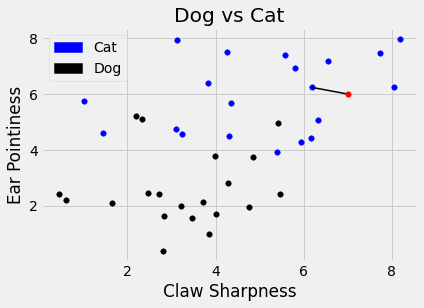

In [14]:
#connect point with it's nearest neighbor

plt.scatter(cat_df['claw sharpness'], cat_df['ear pointiness'] , color='blue', s=30)
plt.scatter(dog_df['claw sharpness'], dog_df['ear pointiness'] , color='black', s=30);
plt.plot((sorted_df['claw sharpness'][0], 7),(sorted_df['ear pointiness'][0],6),'black', linewidth=1.5, zorder = 1);
plt.scatter(7,6 , color='red', s=30);
blue_patch = mpatches.Patch(color='blue', label='Cat')
black_patch = mpatches.Patch(color='black', label='Dog')
plt.legend(handles=[blue_patch, black_patch])

plt.title("Dog vs Cat")
plt.ylabel('Ear Pointiness')
plt.xlabel('Claw Sharpness');

Since the closest neighbor is a cat, we label this new point as a cat.

In [15]:
sorted_df.Label[0]

'cat'

But what happens if we try to classify another data point closer to an outlier.
Consider a new point $(5.8,4.9)$. Should this be classified a 'dog' or 'cat'?

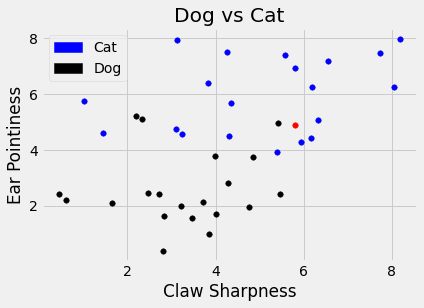

In [16]:
plt.scatter(cat_df['claw sharpness'], cat_df['ear pointiness'] , color='blue', s=30)
plt.scatter(dog_df['claw sharpness'], dog_df['ear pointiness'] , color='black', s=30);
plt.scatter(5.8,4.9 , color='red', s=30);

blue_patch = mpatches.Patch(color='blue', label='Cat')
black_patch = mpatches.Patch(color='black', label='Dog')
plt.legend(handles=[blue_patch, black_patch])
plt.title("Dog vs Cat")
plt.ylabel('Ear Pointiness')
plt.xlabel('Claw Sharpness');

If we repeat the process above on the point $(5.8,4.9)$ by
1. Calculating the distance to this new point for each point in the DataFrame,
2. Sorting the resulting DataFrame from closest to farthest away,

we get the following.

In [17]:
characteristic_df['Distance to point'] =  \
            characteristic_df[['claw sharpness', 'ear pointiness']].  \
            apply(row_wise_distance, args=(np.array([5.8,4.9]),), axis=1)

In [18]:
characteristic_df.sort_values('Distance to point').head(6)

,claw sharpness,ear pointiness,Label,Distance to point
24,5.422290,4.963878,dog,0.383073
2,6.329188,5.066956,cat,0.554901
12,6.168168,4.426849,cat,0.599516
4,5.949133,4.280015,cat,0.637670
7,5.385259,3.926157,cat,1.058480
39,6.183873,6.240770,cat,1.394640


Notice we would classify this new point as 'dog' even though we can see there are more 'cat' labels near the red point. 

One nearest neighbor might not give us enough information to help classify this new point. Instead, it might be useful to rely on multiple neighbors to help us find a label.